In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats

from matplotlib import pyplot as plt
from matplotlib import cm

import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

## Загрузка данных

In [54]:
new_data = pd.read_excel('D:/Jar_test.xlsx', sheet_name = 'new results')
old_data = pd.read_excel('D:/Jar_test.xlsx', sheet_name = 'old results')
new_data = new_data.dropna()
old_data = old_data.dropna()

# Посмотрим на загруженные таблицы
print(new_data.head(2), '\n')
print(old_data.head(2))

            Metric   RPH   Qty     Sla   Min  Median    P95    Max
0        s.c18cess  11.3  34.0  3000.0  21.0    30.0  134.2  158.0
1  s.c27cessToBill  10.0  30.0  3000.0  24.0    32.0  139.7  170.0 

            Metric   RPH   Qty     Sla  Min  Median   P95   Max
0        s.c18cess  15.0  45.0  3000.0  8.0    10.0  26.2  50.0
1  s.c27cessToBill  15.0  45.0  3000.0  7.0    11.0  30.2  43.0


## Визуализация

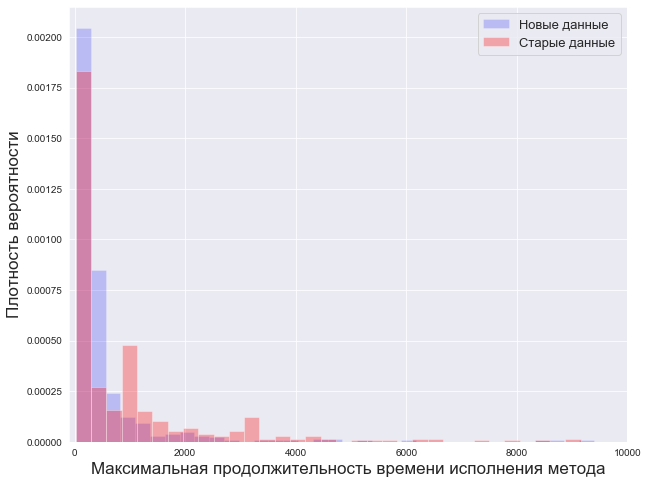

In [39]:
with sns.axes_style("darkgrid"):
    
    plt.hist(new_data['Max'], 350, density = True, color = 'blue', alpha = 0.2, label = 'Новые данные')
    plt.hist(old_data['Max'], 150, density = True, color = 'red', alpha = 0.3, label = 'Старые данные')
    plt.ylabel('Плотность вероятности', fontsize = 17)
    plt.xlabel('Максимальная продолжительность времени исполнения метода', fontsize = 17)
    plt.xlim(-100, 10000)
    plt.legend(fontsize = 13)
    plt.show()

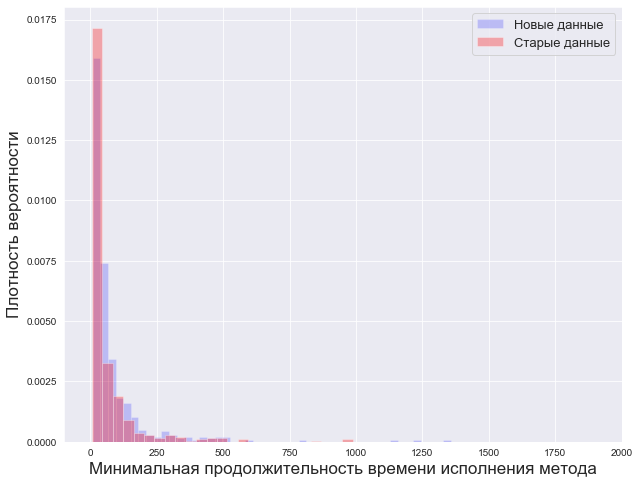

In [40]:
with sns.axes_style("darkgrid"):
    
    plt.hist(new_data['Min'], 300, density = True, color = 'blue', alpha = 0.2, label = 'Новые данные')
    plt.hist(old_data['Min'], 300, density = True, color = 'red', alpha = 0.3, label = 'Старые данные')
    plt.ylabel('Плотность вероятности', fontsize = 17)
    plt.xlabel('Минимальная продолжительность времени исполнения метода', fontsize = 17)
    plt.xlim(-100, 2000)
    plt.legend(fontsize = 13)
    plt.show()

## Тестирование гипотези о принадлжежности двух выборок одной генеральной совокупности

Так как распределения далеки от нормального, воспользуемся непараметрическим критерием Колмогорова-Смирнова.

In [41]:
statistics = []
pvalues = []
for parameter in ['Min', 'Median', 'P95', 'Max']:
    statistic, pvalue = scipy.stats.ks_2samp(new_data[parameter], old_data[parameter])
    statistics.append(statistic)
    pvalues.append(pvalue)
    
# Выведем на экран значения статистик и значения pvalue
print(statistics)
print(pvalues)

[0.3450407137907138, 0.3949540887040887, 0.4779712404712405, 0.2576446638946639]
[1.1172167244798208e-25, 1.6351269668008064e-33, 6.95156618652027e-49, 1.6622745496594147e-14]


Теперь нам необходимо ввести поправку на множественное тестирование

In [42]:
from statsmodels.stats.multitest import multipletests

arr = multipletests(pvalues, method = 'bonferroni')
corrected_pvals = arr[1]

# Выведем на экран значения pvalue после их корректировки
print(statistics)
print(corrected_pvals)

[0.3450407137907138, 0.3949540887040887, 0.4779712404712405, 0.2576446638946639]
[4.46886690e-25 6.54050787e-33 2.78062647e-48 6.64909820e-14]


Как видно, значения статистик во всех случаях оказались больше, чем значение pvalue, следовательно, выборки значимо отличаются.

## Выводы

Мы будем исходить из того, что, чем меньше время исполнения метода, тем лучше. 



In [50]:
print('Минимальное время выполнения методов:')
print('Было -', np.round(np.mean(np.array(old_data['Min'])), 2))
print('Стало -', np.round(np.mean(np.array(new_data['Min'])), 2), '\n')

print('Медианное время выполнения методов:')
print('Было -', np.round(np.mean(np.array(old_data['Median'])), 2))
print('Стало -', np.round(np.mean(np.array(new_data['Median'])), 2), '\n')

print('95й квантиль времени выполнения методов:')
print('Было -', np.round(np.mean(np.array(old_data['P95'])), 2))
print('Стало -', np.round(np.mean(np.array(new_data['P95'])), 2), '\n')

print('Максимальное время выполнения методов:')
print('Было -', np.round(np.mean(np.array(old_data['Max'])), 2))
print('Стало -', np.round(np.mean(np.array(new_data['Max'])), 2), '\n')

Минимальное время выполнения методов:
Было - 117.2
Стало - 139.59 

Медианное время выполнения методов:
Было - 190.65
Стало - 311.77 

95й квантиль времени выполнения методов:
Было - 355.0
Стало - 964.85 

Максимальное время выполнения методов:
Было - 1218.02
Стало - 1664.29 



Таким образом, можно заключить, что старый вариант системы более предпочтительный.